EL021: Lesson 1
===============

The basic idea
--------------
This is the first example in Lesson 1 material

In [1]:
%pylab inline            
from sympy import *      # Python's symbolic manipulator package

Populating the interactive namespace from numpy and matplotlib


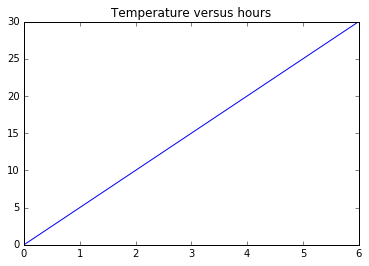

In [2]:
hours = np.array(range(0,7), dtype=np.int32)
temperature = np.array(range(0, 35, 5), dtype=np.int32)

# Drawing the points
pylab.plot(hours, temperature)
pylab.title('Temperature versus hours')

Second step of the generalisation
-----
We will show two plots: plot 1 is the same plot of 'temperature' vs 'hours' as before (in blue) and plot 2 is the equation $y = 5x$ (in red):

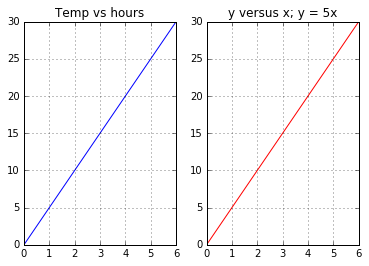

In [3]:
x = np.array(range(0,7), dtype=np.int32)
y = 5*x

# Re-drawing previous plot in blue 
pylab.subplot(1,2,1)
pylab.plot(hours, temperature, 'b')
pylab.title('Temp vs hours')
pylab.grid()

# Drawing new plot in red
pylab.subplot(1,2,2)
pylab.plot(x, y, 'r')
pylab.title('y versus x; y = 5x')
pylab.grid()

Worksheet 1
----

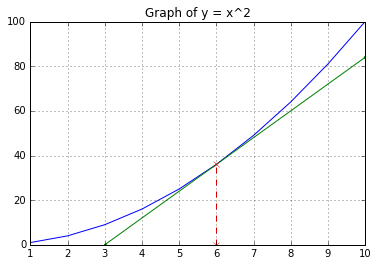

In [4]:
x = np.array(range(1,11), dtype=np.int32)
y = x**2;                                 # x to the power of two
# some convenient points
px = [3,10]
py = [0,84]
lx = [6,6]
ly = [0,36]
pylab.subplot(1,1,1)
pylab.grid() 
pyplot.plot(x,y, 'b')
pyplot.plot(px,py, '.-g')
pyplot.plot(lx, ly, '--xr')
pyplot.title('Graph of y = x^2')

Slope at $x= 6$ for curve $y = x^2$
-------------

In [5]:
slope = (36-0)/(6-3)

# Note that slope of 12 = 2*6; thus at x = 6 the slope is 12 or twice the value of x
print("Slope = ", slope)

Slope =  12.0


In our attempt above, we probably got lucky that we have found a line 
that is a tangent to the curve at the point $x = 6$. 
One way to proceed, when we get out of luck, is to to try with a series of points close to $x = 6$. For example;

gradient =  [ 11.98   11.99   11.995  11.999  12.001  12.005  12.01   12.02 ]


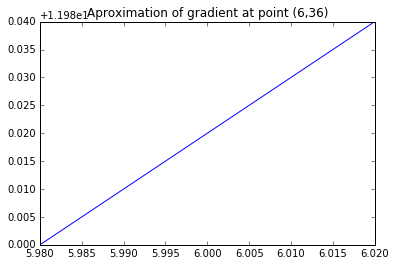

In [6]:
x = np.array([5.98, 5.99, 5.995, 5.999, 6.001, 6.005, 6.01, 6.02])
y = x**2
deltax = x-6
deltay = y-36   # note that when x = 6 -> y = 6*6 = 36
gradient = deltay/deltax #Note these are approximations of the gradient at x = 6

#Drawing it
pyplot.plot(x, gradient)
pyplot.title('Aproximation of gradient at point (6,36)')
print ("gradient = ", gradient)
# Note the gradient at point (6,36) is roughly twice the value of ordinate x (12 = 2*6)


Using symbolic manipulation 
-----------

In [7]:
init_printing(use_latex=True)    # required for pretty printing of the math

In [8]:
x, dx = symbols('x dx')

inc_of_x = (x+dx) - x
inc_of_y = simplify((x+dx)**2 - x**2)
g = inc_of_y/inc_of_x

g

In [9]:
# let's compute the limit of the gradient g when dx approaches zero
limit(g, dx, 0)

It is the limit of the gradient expresion what is of interest. From now on, this is what we seek to find. This procedure is referred to as *differentiating from first principles* (according to the recommended textbook). Let's try it again with the expression: $x^3 +5$

In [10]:
inc_of_y = simplify( expand( (x+dx)**3 + 5) - (x**3 + 5) )
inc_of_x = (x+dx) - x
g = inc_of_y/inc_of_x
limit(g, dx, 0)

Finding the gradient at the point (2, 13) on the curve; $x = 2$. Notice the limit of the gradient for the curve $x^3 + 5$ gives the expression $3x^2$ , and so at $x = 2$ the gradient is $3(2^2) = 12$. It happens that *Python's sympy* package can also perform the differentiation; it is performed in this way:

In [11]:
f1 = x**2                            # function
df1 = diff(f1, x)                    # Simply use the function "diff" for the derivative
print ("(Function, derivative)")
f1, df1

(Function, derivative)


In [12]:
f2 = x**3 + 5
df2 = diff(f2, x)
print ("(Function, derivative)")
f2, df2

(Function, derivative)


Further exercises
------------------
By differentiating from first principles, find the derivative of:

a) $x-1$ and the gradient of the curve at point (3, 2)

b) $x^2-x$ and the gradient of the curve at point (1, 0)


Solution to exercise a)

In [13]:
fa = x-1
inc_of_y = simplify( (x+dx) - 1 - (x -1) )
inc_of_x = (x + dx) - x
g = inc_of_y/inc_of_x;
sol_a = limit(g, dx, 0)
print ("(Function, derivative)")
fa, sol_a

(Function, derivative)


In [14]:
# Gradient at point (3, 2), x = 3, but gradient does not depend on x, so
# gradient at point (3, 2) is 1.
# checking with sympy
dfa = diff(x-1, x)
Eq(sol_a, dfa)

Solution to exercise b)

In [15]:
fb = x**2 -x
inc_of_y = simplify( expand((x+dx)**2-(x+dx)) - expand(x**2 - x) )
inc_of_x = (x + dx) - x;
g = inc_of_y/inc_of_x;
sol_b = limit(g, dx, 0)
print ("(Function, derivative)")
fb, sol_b

(Function, derivative)


In [16]:
# Gradient at point (1, 0); x = 1, so gradient is 2*1 - 1 = 1.
# Checking derivative with sympy
dfb = diff(x**2-x, x)
Eq(sol_b, dfb)